In [1]:
import os
import re
import numpy as np
import pandas as pd
import gzip
import time
import matplotlib.pyplot as plt
%matplotlib inline
print('Packages loaded')

Packages loaded


In [4]:
def regex_match(start_with, end_with, folder):
    m = re.search(start_with+end_with, folder)
    if m!=None:
        return True
    else:
        return False

_maf_re = re.compile(r'\bMAF=([^;]+)')

def extract_maf_regex(info_str):
    """
    Use a regular expression to grab the MAF= value.
    """
    m = _maf_re.search(info_str)
    if not m:
        return None
    try:
        return float(m.group(1))
    except ValueError:
        return None

def classify_maf(maf):
    if maf < 0.001:
        return 'rare'
    elif maf > 0.05:
        return 'common'
    else:
        return 'none'

# pred1 Vs pred150: rare Vs common

In [5]:
inPath = '/scratch/ml-csm/datasets/genomics/ref-genome/human/GRCh38/ensembl/variants/processed/'
df_maf = pd.read_parquet(inPath+'1000GENOMES-release114-maf.parquet.gz')

df_maf['category'] = df_maf['maf'].apply(classify_maf)
df_maf.dropna(inplace=True, ignore_index=True)
df_maf

,chrom,pos,id,ref,alt,maf,category
0,1,51479,rs116400033,T,A,0.104199,common
1,1,51954,rs185832753,G,"A,C,T",0.000196,rare
2,1,54490,rs141149254,G,"A,C",0.096939,common
3,1,54669,rs532505601,C,T,0.000196,rare
4,1,54716,rs569128616,C,"A,T",0.213305,common
...,...,...,...,...,...,...,...
69542010,22,50795771,rs6010092,T,C,0.032182,none
69542011,22,50795915,rs374867791,G,T,0.076727,common
69542012,22,50796090,rs537052521,C,G,0.000196,rare
69542013,22,50796204,rs6010093,G,"A,C",0.002943,none


In [ ]:
group=2
inPath1 = '/scratch/ml-csm/projects/fgenom/gve/output/kmeans/annotations/sign_var_pred1/2/'
inPath150 = '/scratch/ml-csm/projects/fgenom/gve/output/kmeans/annotations/sign_var_pred150/2/'
files = os.listdir(inPath1)

rare_vs_common_dict = {}
for file in files:
    if regex_match('^.', '*.bed$', file):
        try:
            print(file)
            df1 = pd.read_csv(inPath1 + file, sep='\t', header=None)
            df1.columns = ['chrom', 'start', 'end', 'var_id', 'gve']
            # print(file, df1.shape)
            ind1 = df_maf['id'].isin(df1['var_id'])
            df_maf_pred1 = df_maf[ind1]
            rare_count = (df_maf_pred1['category'] == 'rare').sum()
            common_count = (df_maf_pred1['category'] == 'common').sum()
            # print(f'rare: {rare_count}, common: {common_count}')
    
            df150 = pd.read_csv(inPath150 + file, sep='\t', header=None)
            df150.columns = ['chrom', 'start', 'end', 'gve', 'pval', 'var_id']
            # print(file, df150.shape)
            ind150 = df_maf['id'].isin(df150['var_id'])
            df_maf_pred150 = df_maf[ind150]
            rare_count150 = (df_maf_pred150['category'] == 'rare').sum()
            common_count150 = (df_maf_pred150['category'] == 'common').sum()
            # print(f'rare: {rare_count150}, common: {common_count150}')
            rare_vs_common_dict[file[:-4]] = [df1.shape[0], rare_count, common_count, df150.shape[0], rare_count150, common_count150]
        except:
            print(f'something is wrong with {file}')
df = pd.DataFrame.from_dict(rare_vs_common_dict, orient='index', columns = ['pred1', 'pred1_rare', 'pred1_common', 'pred150', 'pred150_rare', 'pred150_common'])
df.insert(loc=0, column='profile', value=df.index)
df.insert(loc=4, column='pred1_rare_Vs_common', value=df['pred1_rare']/df['pred1_common'])
df.insert(loc=8, column='pred150_rare_Vs_common', value=df['pred150_rare']/df['pred150_common'])
df.to_csv(f'GVE_peak/data/enrich_ana/gp{group}_rare_Vs_common.csv', index=False)
df

spnlc_H3K36me3_None.bed
brn_H3K36me3_None_1.bed
nrn_H3K36me3_None.bed
lyroh_H3K36me3_None_1.bed
nrlc_H3K79me2_None.bed
nrlpc_H3K36me3_None.bed
SKNSH_H3K36me3_al_6M_48hr.bed
nrnlsc_H3K79me1_None.bed
nrlc_H4K20me1_None.bed
nrlpc_H4K20me1_None.bed
nrlpc_H3K79me2_None.bed
brnmec_H3K36me3_None.bed
sbstntn_H3K36me3_None_1.bed
nrsphr_H3K36me3_None_2.bed
strcyt_H3K36me3_None.bed
cdtn_H3K36me3_None_2.bed
SKNSH_H4K20me1_None.bed
blrn_H4K20me1_do_0.5gmL_4d.bed
blrn_H3K36me3_do_0.5gmL_4d.bed
SKNSH_H3K36me3_None_1.bed
strcyt_H3K79me2_None.bed
SKNSH_H3K79me2_None.bed
blrn_H3K79me2_do_0.5gmL_4d.bed
nrlc_H3K36me3_None.bed
mddlfa4_H3K36me3_None_1.bed
cngltg_H3K36me3_None_2.bed
nrnlsc_H3K36me3_None_1.bed
SK-N-MC_H3K36me3_None.bed
grmnlm_H3K36me3_None_2.bed
strcyt_H4K20me1_None.bed
tmprll_H3K36me3_None_2.bed
BE2C_H3K36me3_None.bed
nglrg_H3K36me3_None_1.bed
tbln_H3K36me3_None_3.bed


,pred1,pred1_rare,pred1_common,pred150,pred150_rare,pred150_common
spnlc_H3K36me3_None,553128,5662,7436,266916,10012,6272
brn_H3K36me3_None_1,1017283,20222,10040,354569,13447,8178
nrn_H3K36me3_None,167375,1628,1997,520513,19770,11739
lyroh_H3K36me3_None_1,96559,1445,331,104889,4006,2477
nrlc_H3K79me2_None,2598860,56307,28012,68632,2572,1775
nrlpc_H3K36me3_None,469180,5226,5965,70449,2697,1635
SKNSH_H3K36me3_al_6M_48hr,800188,8682,10191,43799,1719,1060
nrnlsc_H3K79me1_None,160698,1590,1922,7150,296,172
nrlc_H4K20me1_None,156823,1608,1902,58,3,0
nrlpc_H4K20me1_None,496669,11364,3090,59768,2225,1489


In [ ]:
group=3
inPath1 = f'/scratch/ml-csm/projects/fgenom/gve/output/kmeans/annotations/sign_var_pred1/{group}/'
inPath150 = f'/scratch/ml-csm/projects/fgenom/gve/output/kmeans/annotations/sign_var_pred150/{group}/'
files = os.listdir(inPath1)

rare_vs_common_dict = {}
for file in files:
    if regex_match('^.', '*.bed$', file):
        try:
            print(file)
            df1 = pd.read_csv(inPath1 + file, sep='\t', header=None)
            df1.columns = ['chrom', 'start', 'end', 'var_id', 'gve']
            # print(file, df1.shape)
            ind1 = df_maf['id'].isin(df1['var_id'])
            df_maf_pred1 = df_maf[ind1]
            rare_count = (df_maf_pred1['category'] == 'rare').sum()
            common_count = (df_maf_pred1['category'] == 'common').sum()
            # print(f'rare: {rare_count}, common: {common_count}')
    
            df150 = pd.read_csv(inPath150 + file, sep='\t', header=None)
            df150.columns = ['chrom', 'start', 'end', 'gve', 'pval', 'var_id']
            # print(file, df150.shape)
            ind150 = df_maf['id'].isin(df150['var_id'])
            df_maf_pred150 = df_maf[ind150]
            rare_count150 = (df_maf_pred150['category'] == 'rare').sum()
            common_count150 = (df_maf_pred150['category'] == 'common').sum()
            # print(f'rare: {rare_count150}, common: {common_count150}')
            rare_vs_common_dict[file[:-4]] = [df1.shape[0], rare_count, common_count, df150.shape[0], rare_count150, common_count150]
        except:
            print(f'something is wrong with {file}')
df = pd.DataFrame.from_dict(rare_vs_common_dict, orient='index', columns = ['pred1', 'pred1_rare', 'pred1_common', 'pred150', 'pred150_rare', 'pred150_common'])
df.insert(loc=0, column='profile', value=df.index)
df.insert(loc=4, column='pred1_rare_Vs_common', value=df['pred1_rare']/df['pred1_common'])
df.insert(loc=8, column='pred150_rare_Vs_common', value=df['pred150_rare']/df['pred150_common'])
df.to_csv(f'GVE_peak/data/enrich_ana/gp{group}_rare_Vs_common.csv', index=False)
df

nrnlsc_H3K27me3_None_1.bed
tbln_H3K9me3_None_2.bed
cdtn_H3K27me3_None_2.bed
SKNSH_H3K9me3_None_1.bed
tmprll_H3K9me3_None_1.bed
lyroh_H3K27me3_None_2.bed
lyroh_H3K9me3_None_3.bed
nrnlsc_H3K9me3_None_1.bed
nrsphr_H3K9me3_None_4.bed
tbln_H3K27me3_None_2.bed
nrn_H3K27me3_None.bed
brnmec_H3K27me3_None.bed
cdtn_H3K9me3_None_1.bed
spnlc_H3K9me3_None.bed
strcyt_EZH2_None.bed
mddlfa4_H3K9me3_None_2.bed
strcyt_H3K9me3_None.bed
nrn_H3K9me3_None.bed
tmprll_H3K27me3_None_2.bed
blrn_H3K27me3_do_0.5gmL_4d.bed
SKNSH_H3K27me3_None.bed
nglrg_H3K27me3_None.bed
SKNSH_H3K27me3_al_6M_48hr.bed
nrlc_H3K9me3_None.bed
nrlc_H3K27me3_None.bed
brn_H3K9me3_None_1.bed
cngltg_H3K9me3_None_1.bed
grmnlm_H3K9me3_None_2.bed
SK-N-MC_EZH2_None.bed
blrn_H3K9me2_do_0.5gmL_4d.bed
sbstntn_H3K9me3_None_1.bed
cngltg_H3K27me3_None.bed
nrlpc_H3K27me3_None.bed
grmnlm_H3K27me3_None_2.bed
BE2C_H3K27me3_None.bed
SKNSH_EZH2_None.bed
something is wrong with SKNSH_EZH2_None.bed
nrlpc_H3K9me3_None.bed
brn_H3K27me3_None_1.bed
nrsphr_H3K27m

/home/sdodl001/envs/fugep/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/home/sdodl001/envs/fugep/lib/python3.10/site-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/home/sdodl001/envs/fugep/lib/python3.10/site-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,profile,pred1,pred1_rare,pred1_common,pred1_rare_Vs_common,pred150,pred150_rare,pred150_common,pred150_rare_Vs_common
nrnlsc_H3K27me3_None_1,nrnlsc_H3K27me3_None_1,9792,106,88,1.204545,45991,321,404,0.794554
tbln_H3K9me3_None_2,tbln_H3K9me3_None_2,93044,1004,923,1.087757,525902,17001,6665,2.550788
cdtn_H3K27me3_None_2,cdtn_H3K27me3_None_2,69272,3269,739,4.423545,2806,16,19,0.842105
SKNSH_H3K9me3_None_1,SKNSH_H3K9me3_None_1,161309,1594,1499,1.063376,66651,2355,807,2.918216
tmprll_H3K9me3_None_1,tmprll_H3K9me3_None_1,45610,581,409,1.420538,69775,3350,825,4.060606
lyroh_H3K27me3_None_2,lyroh_H3K27me3_None_2,30724,1261,245,5.146939,5009,32,33,0.969697
lyroh_H3K9me3_None_3,lyroh_H3K9me3_None_3,178222,1985,1532,1.295692,40517,2139,448,4.774554
nrnlsc_H3K9me3_None_1,nrnlsc_H3K9me3_None_1,185756,2183,1735,1.258213,98753,4555,1132,4.023852
nrsphr_H3K9me3_None_4,nrsphr_H3K9me3_None_4,11167,646,103,6.271845,739742,21348,9078,2.351619
tbln_H3K27me3_None_2,tbln_H3K27me3_None_2,27624,223,238,0.936975,53370,350,461,0.759219


In [ ]:
group = 2
df_gp2 = pd.read_csv(f'GVE_peak/data/enrich_ana/gp{group}_rare_Vs_common.csv')
group = 3
df_gp3 = pd.read_csv(f'GVE_peak/data/enrich_ana/gp{group}_rare_Vs_common.csv')

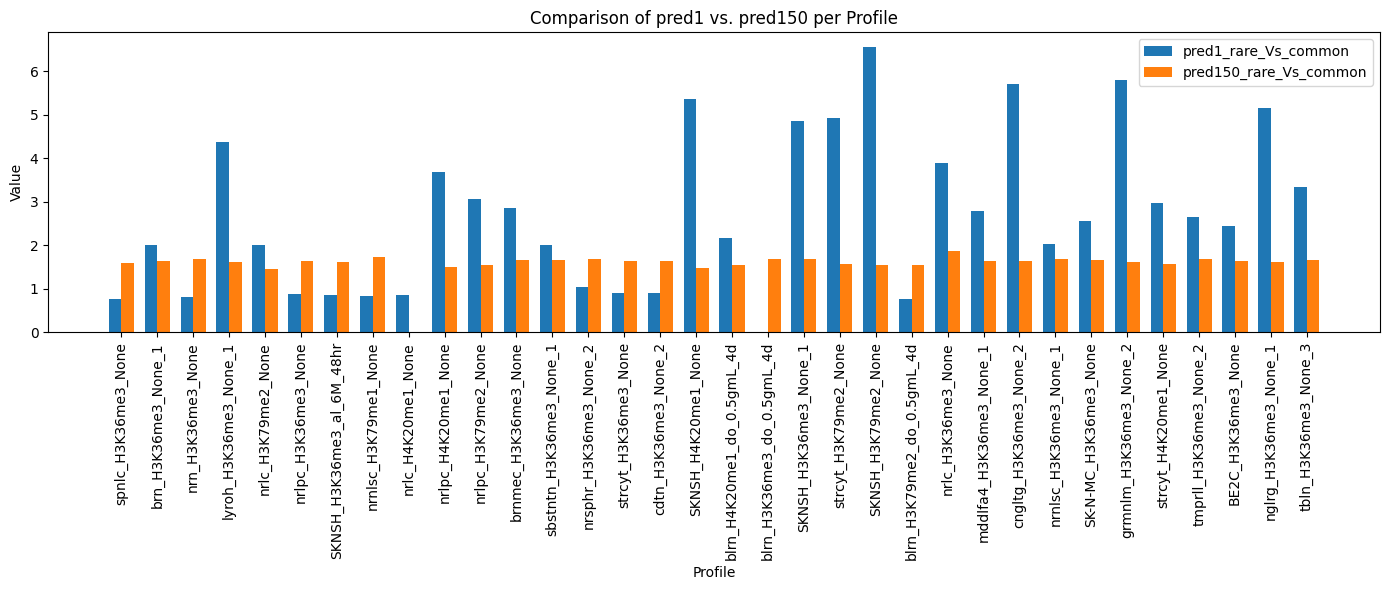

In [ ]:
df = df_gp2.loc[:, ['profile', 'pred1_rare_Vs_common', 'pred150_rare_Vs_common']]

import numpy as np
import matplotlib.pyplot as plt

# Suppose your DataFrame is named `df`
# and has columns: "profile", "pred1_rare_Vs_common", "pred150_rare_Vs_common"

profiles = df['profile'].tolist()
vals1    = df['pred1_rare_Vs_common'].fillna(0).tolist()   # handle any NaNs
vals2    = df['pred150_rare_Vs_common'].fillna(0).tolist()

x = np.arange(len(profiles))
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(14, 6))

# plot the two sets of bars
ax.bar(x - width/2, vals1, width, label='pred1_rare_Vs_common')
ax.bar(x + width/2, vals2, width, label='pred150_rare_Vs_common')

# set ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(profiles, rotation=90, ha='center')
ax.set_xlabel('Profile')
ax.set_ylabel('Value')
ax.set_title('Comparison of pred1 vs. pred150 per Profile')
ax.legend()

plt.tight_layout()
plt.show()


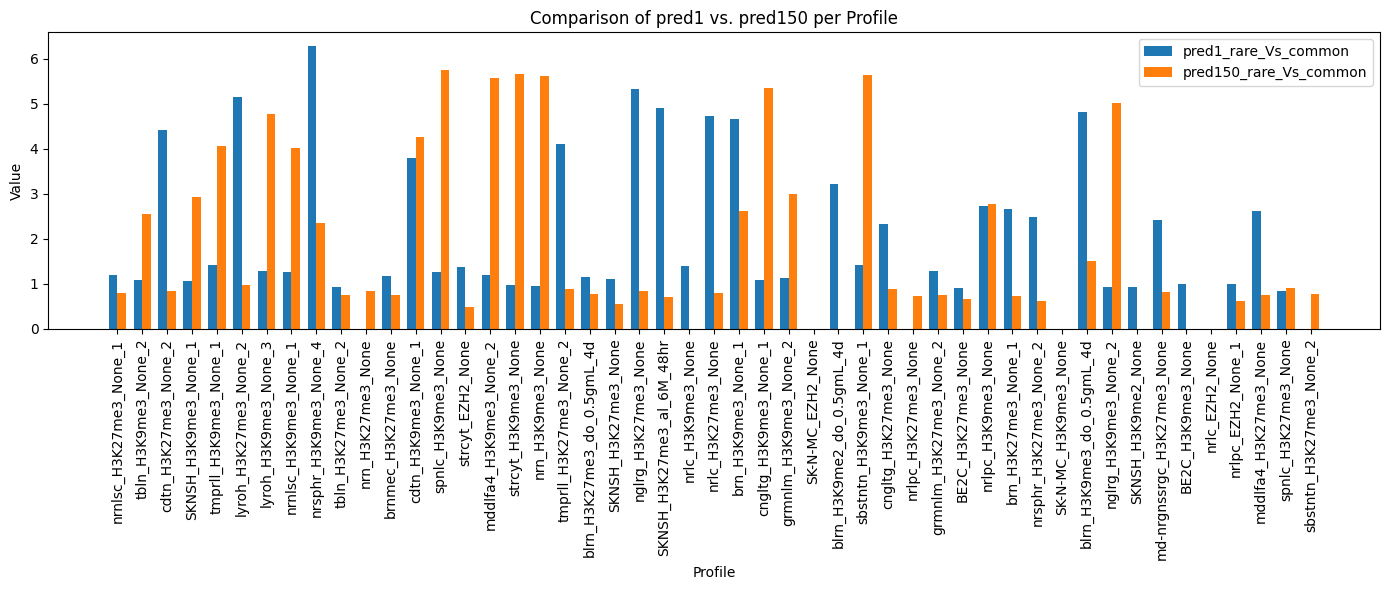

In [ ]:
df = df_gp3.loc[:, ['profile', 'pred1_rare_Vs_common', 'pred150_rare_Vs_common']]

import numpy as np
import matplotlib.pyplot as plt

# Suppose your DataFrame is named `df`
# and has columns: "profile", "pred1_rare_Vs_common", "pred150_rare_Vs_common"

profiles = df['profile'].tolist()
vals1    = df['pred1_rare_Vs_common'].fillna(0).tolist()   # handle any NaNs
vals2    = df['pred150_rare_Vs_common'].fillna(0).tolist()

x = np.arange(len(profiles))
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(14, 6))

# plot the two sets of bars
ax.bar(x - width/2, vals1, width, label='pred1_rare_Vs_common')
ax.bar(x + width/2, vals2, width, label='pred150_rare_Vs_common')

# set ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(profiles, rotation=90, ha='center')
ax.set_xlabel('Profile')
ax.set_ylabel('Value')
ax.set_title('Comparison of pred1 vs. pred150 per Profile')
ax.legend()

plt.tight_layout()
plt.show()